In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
medical_examination = r"C:\Users\Admin\Desktop\Hanine\Portfolio\freecodecamp\medical_examination.csv"
df = pd.read_csv(medical_examination)

print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


# overweight column

In [4]:
# Add 'overweight' column
df["bmi"] = df["weight"] / (df["height"] / 100) ** 2

print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio        bmi  
0     0       1       0  21.967120  
1     0       1       1  34.927679  
2     0       0       1  23.507805  
3     0       1       1  28.710479  
4     0       0       0  23.011177  


In [5]:
df["overweight"] = (df["bmi"] > 25).astype(int)

print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio        bmi  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


# Normalizing Data

In [6]:
df["cholesterol"] = df["cholesterol"].replace({1: 0, 2: 1, 3: 1})

print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     1      0   
1   1  20228    1     156    85.0    140     90            1     1      0   
2   2  18857    1     165    64.0    130     70            1     1      0   
3   3  17623    2     169    82.0    150    100            0     1      0   
4   4  17474    1     156    56.0    100     60            0     1      0   

   alco  active  cardio        bmi  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


In [7]:
df["gluc"] = df["gluc"].replace({1: 0, 2: 1, 3: 1})

print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   

   alco  active  cardio        bmi  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


# Draw the Categorical Plot

In [16]:
# Define the function
def draw_cat_plot():

# Prepare the data (modify it to long format )
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )
    
# Draw the catplot
    fig = sns.catplot(
        x='variable',
        hue='value',
        col='cardio',
        data=df_cat,
        kind='count'
    ).fig

# Return the figure object
    return fig


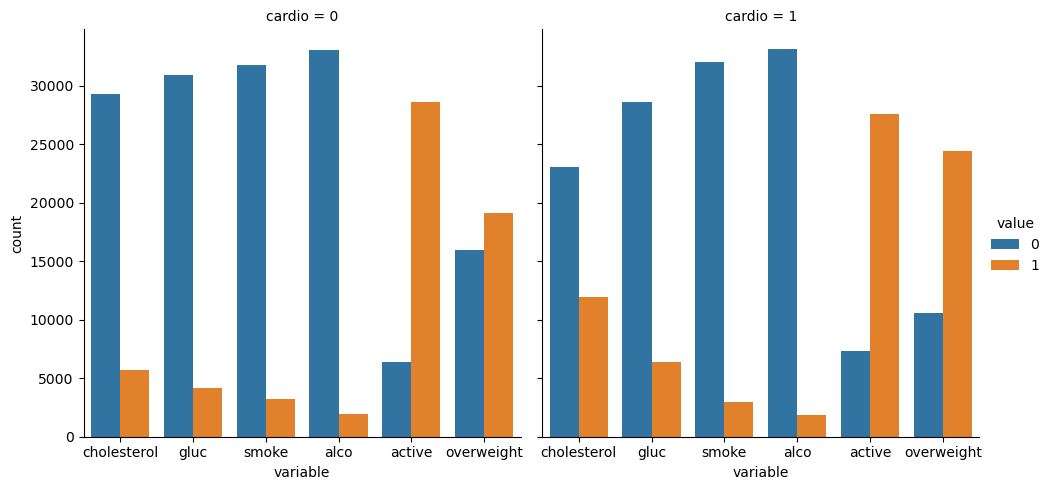

In [17]:
draw_cat_plot()
plt.show()

# draw_heat_map()

In [18]:
def draw_heat_map():
     # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &  # diastolic <= systolic
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]
    
    # Calculate correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(corr)
    
     # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        center=0,
        vmax=0.3,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5}
    )

    # Return the figure
    return fig
    

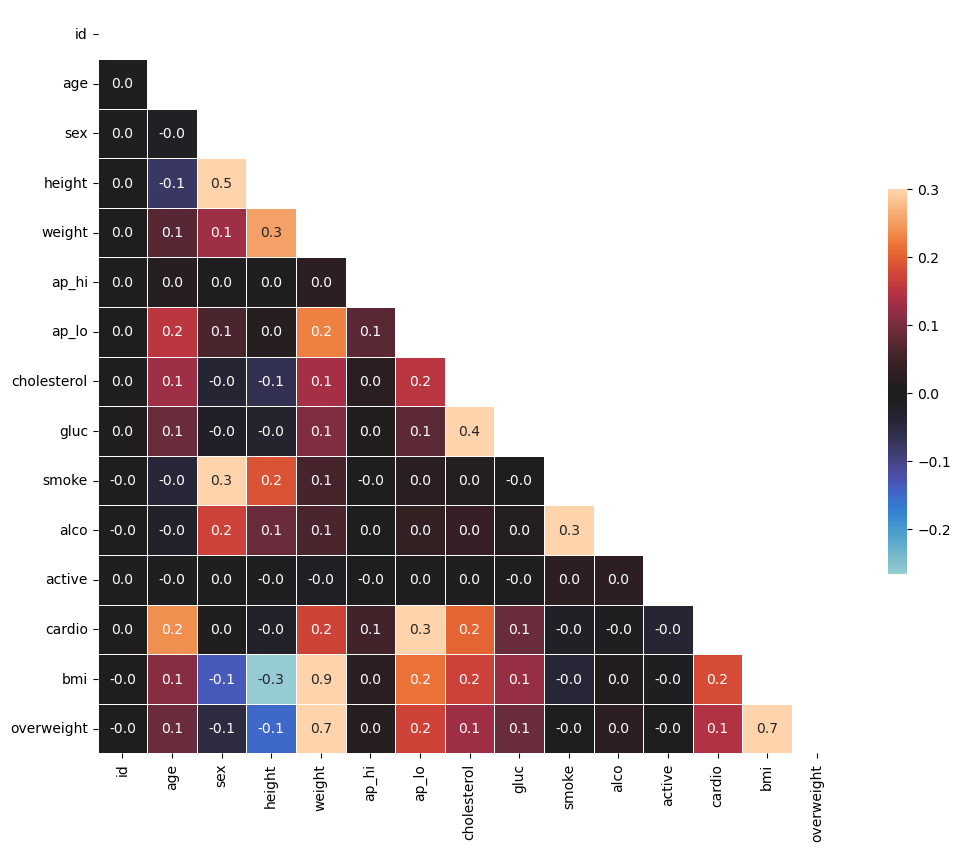

In [19]:
draw_heat_map()
plt.show()